In [1]:
import tensorflow as tf
import numpy as np
import pickle

In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_16_2.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation, :]
x_train = input_data[:100000,:]
x_valid = input_data[100000:102500, :]
x_test = input_data[102500:,:]



(105000, 24)


In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_16_2.pickle','rb') as file:
    output_data = pickle.load(file)
    
output_data = np.transpose(output_data)
output_data = output_data[permutation, :]
y_train = output_data[:100000,:]
y_valid = output_data[100000:102500, :]
y_test = output_data[102500:,:]
print(output_data.shape)

(105000, 12)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 50, verbose = 2,validation_data = (x_valid, y_valid))


Train on 100000 samples, validate on 2500 samples
Epoch 1/50
100000/100000 - 4s - loss: 0.3997 - accuracy: 0.8356 - val_loss: 0.3064 - val_accuracy: 0.8585
Epoch 2/50
100000/100000 - 3s - loss: 0.2536 - accuracy: 0.8837 - val_loss: 0.2187 - val_accuracy: 0.8978
Epoch 3/50
100000/100000 - 3s - loss: 0.1945 - accuracy: 0.9083 - val_loss: 0.1777 - val_accuracy: 0.9139
Epoch 4/50
100000/100000 - 3s - loss: 0.1691 - accuracy: 0.9187 - val_loss: 0.1633 - val_accuracy: 0.9211
Epoch 5/50
100000/100000 - 3s - loss: 0.1571 - accuracy: 0.9242 - val_loss: 0.1562 - val_accuracy: 0.9229
Epoch 6/50
100000/100000 - 3s - loss: 0.1507 - accuracy: 0.9278 - val_loss: 0.1510 - val_accuracy: 0.9259
Epoch 7/50
100000/100000 - 3s - loss: 0.1453 - accuracy: 0.9310 - val_loss: 0.1444 - val_accuracy: 0.9308
Epoch 8/50
100000/100000 - 3s - loss: 0.1413 - accuracy: 0.9336 - val_loss: 0.1413 - val_accuracy: 0.9327
Epoch 9/50
100000/100000 - 3s - loss: 0.1361 - accuracy: 0.9365 - val_loss: 0.1383 - val_accuracy: 0.9

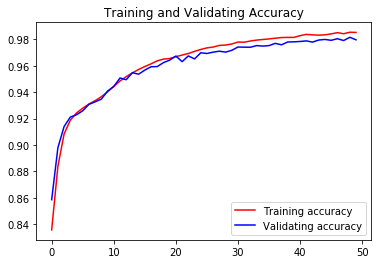

In [7]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [8]:
model.evaluate(x_test, y_test, verbose = 2)

2500/1 - 0s - loss: 0.0527 - accuracy: 0.9800


[0.049677631866931915, 0.9799667]

In [9]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_16_2_model.h5')